In [1]:
import pandas as pd
import numpy as np

In [2]:

data1=pd.read_csv('Desktop/PROJECT/fitting_data.csv',low_memory=False)

data2=pd.read_csv('Desktop/PROJECT/missing_flag_columns.csv',low_memory=False)

In [3]:
data1.columns


Index(['id', 'loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_util',
       'initial_list_status', 'collections_12_mths_ex_med', 'acc_now_delinq'],
      dtype='object')

In [4]:
data1=data1.drop('int_rate',axis=1)

In [5]:

data1['grade']=data1['sub_grade'].str[0]
data1=data1.drop('sub_grade',axis=1)

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
numeric_data1 = data1.select_dtypes(include=np.number)
X = add_constant(numeric_data1) 

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

C:\Users\jyoti\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


                       feature        VIF
0                        const   0.000000
1                           id   2.542793
2                    loan_amnt  41.313996
3                         term   3.589654
4                  installment  35.906281
5                   annual_inc   1.236168
6                      issue_d   2.565685
7                  loan_status   1.101586
8                          dti   1.310627
9                  delinq_2yrs   1.331807
10              inq_last_6mths   1.059973
11      mths_since_last_delinq   1.319086
12                    open_acc   1.264961
13                     pub_rec   1.062033
14                  revol_util   1.200137
15  collections_12_mths_ex_med   1.007624
16              acc_now_delinq   1.021535


In [7]:
data1=data1.drop(['installment','earliest_cr_line'],axis=1)

In [8]:

import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
numeric_data1 = data1.select_dtypes(include=np.number)
X = add_constant(numeric_data1)  

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

C:\Users\jyoti\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


                       feature       VIF
0                        const  0.000000
1                           id  2.535141
2                    loan_amnt  1.416328
3                         term  1.209995
4                   annual_inc  1.232973
5                      issue_d  2.553893
6                  loan_status  1.098133
7                          dti  1.310202
8                  delinq_2yrs  1.327123
9               inq_last_6mths  1.032624
10      mths_since_last_delinq  1.318902
11                    open_acc  1.264803
12                     pub_rec  1.057619
13                  revol_util  1.146925
14  collections_12_mths_ex_med  1.007275
15              acc_now_delinq  1.021119


In [9]:
data1[['grade','verification_status','purpose']]


,grade,verification_status,purpose
0,B,Verified,D
1,C,Not Verified,G
2,C,Verified,F
3,A,Verified,A
4,E,Verified,B
...,...,...,...
221652,B,Verified,G
221653,D,Verified,G
221654,A,Not Verified,G
221655,D,Verified,G


In [10]:

from sklearn.preprocessing import OrdinalEncoder
grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
purpose_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
verification_order = ['Not Verified','Verified']
categories = [purpose_order, grade_order, verification_order]
ordinal_enc = OrdinalEncoder(categories=categories)
data1[['purpose', 'grade', 'verification_status']] = ordinal_enc.fit_transform(
    data1[['purpose', 'grade', 'verification_status']]
)


In [11]:
data1['initial_list_status'].value_counts()

initial_list_status
f    156638
w     65019
Name: count, dtype: int64

In [12]:

data1['initial_list_status'] = data1['initial_list_status'].map({'w': 0, 'f': 1})


data1['initial_list_status'].value_counts()

initial_list_status
1    156638
0     65019
Name: count, dtype: int64

In [13]:

continuous_cols = [
    'loan_amnt',
    'annual_inc',
    'dti',
    'mths_since_last_delinq',
    'revol_util'
]


In [14]:

def detect_outliers_iqr(df, columns):
    outlier_summary = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_count = outliers.shape[0]
        outlier_summary[col] = {
            'Q1': round(Q1, 2),
            'Q3': round(Q3, 2),
            'IQR': round(IQR, 2),
            'Lower Bound': round(lower_bound, 2),
            'Upper Bound': round(upper_bound, 2),
            'Outlier Count': outlier_count
        }
    return pd.DataFrame(outlier_summary).T
outlier_results = detect_outliers_iqr(data1, continuous_cols)
print(outlier_results)


                              Q1        Q3      IQR  Lower Bound  Upper Bound  \
loan_amnt                7200.00  18000.00  10800.0     -9000.00     34200.00   
annual_inc              45000.00  90000.00  45000.0    -22500.00    157500.00   
dti                        10.56     21.76     11.2        -6.24        38.56   
mths_since_last_delinq     32.00     32.00      0.0        32.00        32.00   
revol_util                 35.30     73.00     37.7       -21.25       129.55   

                        Outlier Count  
loan_amnt                      7185.0  
annual_inc                     8934.0  
dti                             370.0  
mths_since_last_delinq        97910.0  
revol_util                        9.0  


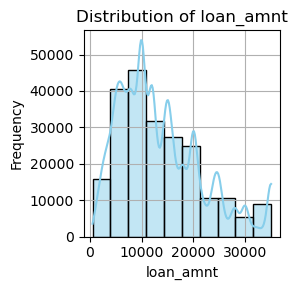

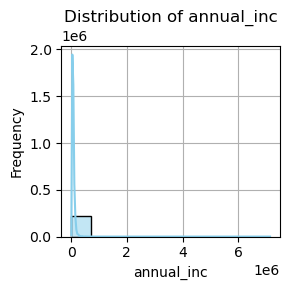

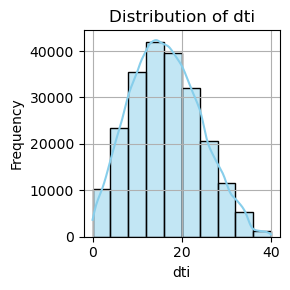

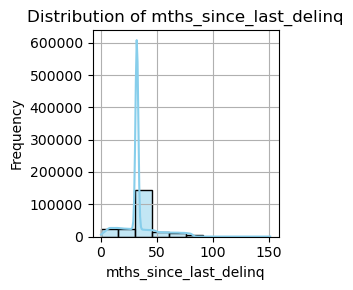

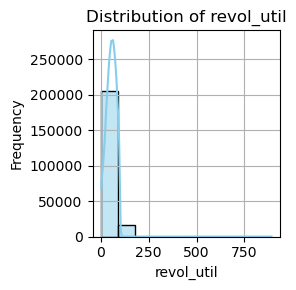

In [15]:

import seaborn as sns
import matplotlib.pyplot as plt

continuous_cols = [
    'loan_amnt', 'annual_inc',
    'dti', 'mths_since_last_delinq', 'revol_util'
]

for col in continuous_cols:
    plt.figure(figsize=(3, 3))
    sns.histplot(data1[col], kde=True, bins=10, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [16]:


from scipy.stats import zscore

# Compute Z-scores
z_scores = data1[continuous_cols].apply(zscore)

# Flag as outlier if Z > 3 or Z < -3
z_outliers = (z_scores.abs() > 3)

# Count outliers per column
z_outlier_counts = z_outliers.sum()

print(z_outlier_counts)



loan_amnt                    0
annual_inc                2114
dti                         55
mths_since_last_delinq    2945
revol_util                  10
dtype: int64


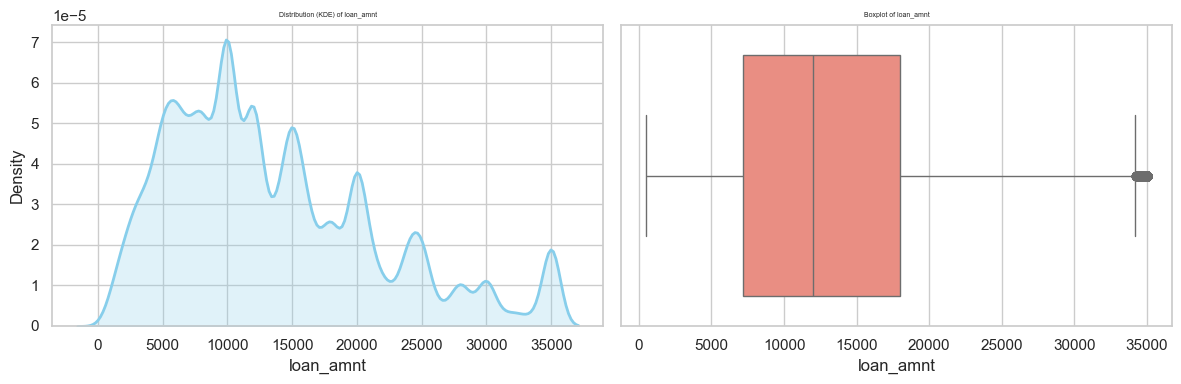

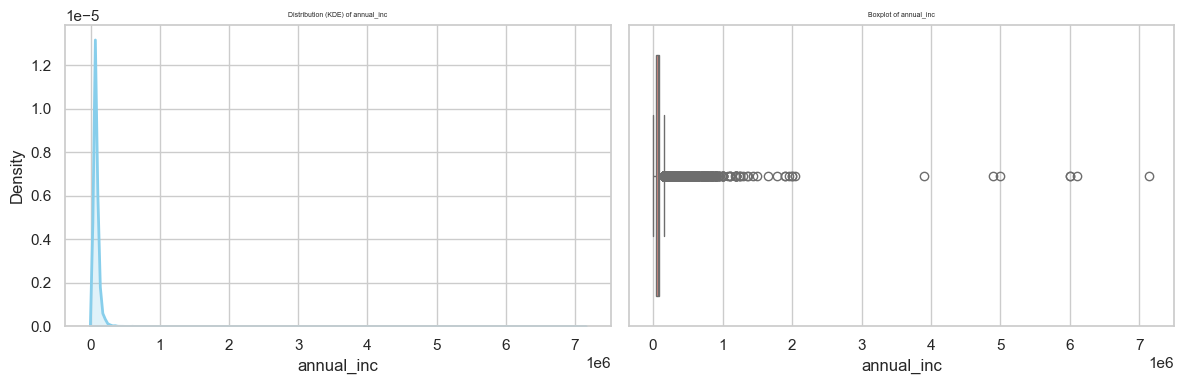

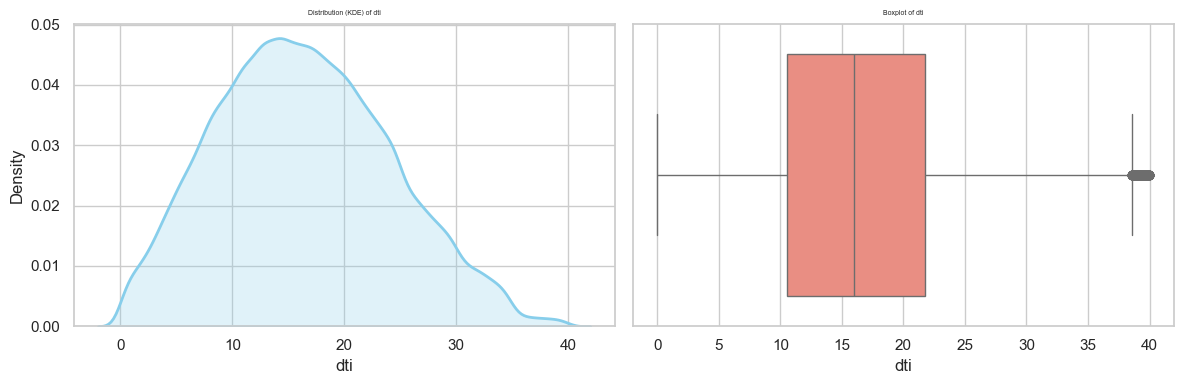

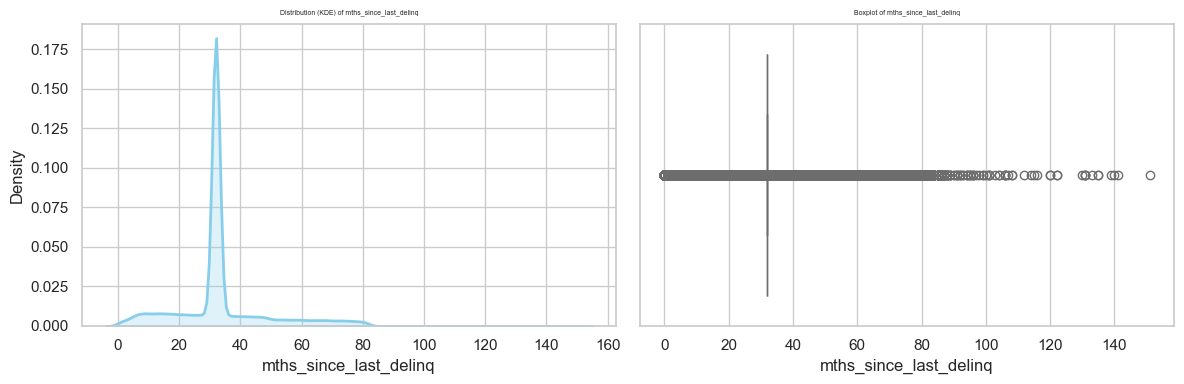

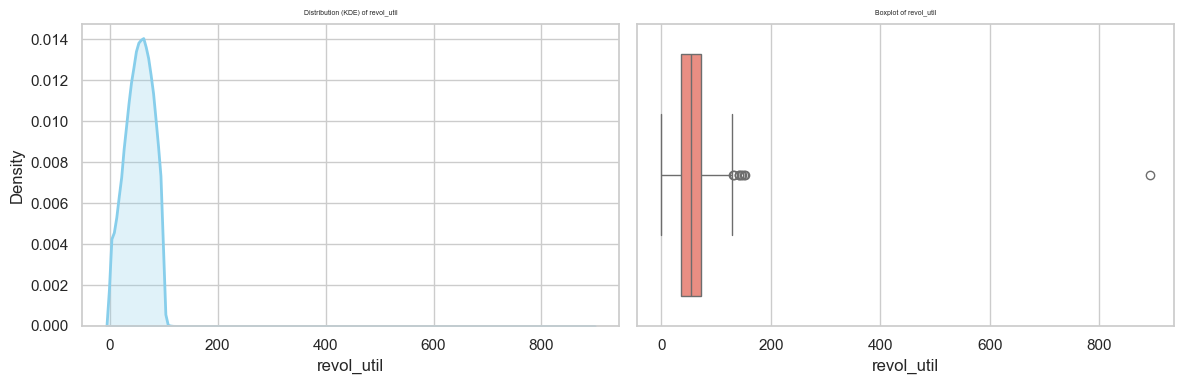

In [17]:

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
for col in continuous_cols:
    plt.figure(figsize=(12,4))

    # KDE Plot (Distribution Plot)
    plt.subplot(1, 2, 1)
    sns.kdeplot(data=data1[col].dropna(), fill=True, color='skyblue', linewidth=2)
    plt.title(f'Distribution (KDE) of {col}', fontsize=5)
    plt.xlabel(col)
    plt.ylabel('Density')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data1[col], color='salmon')
    plt.title(f'Boxplot of {col}', fontsize=5)
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

In [18]:

Q1 = data1['loan_amnt'].quantile(0.25)
Q3 = data1['loan_amnt'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

data1['loan_amnt'] = np.where(data1['loan_amnt'] > upper, upper,
                              np.where(data1['loan_amnt'] < lower, lower, data1['loan_amnt']))



In [19]:

#z_scores = zscore(data1['int_rate'].fillna(data1['int_rate'].mean()))
#mean_val = data1['int_rate'].mean()


In [20]:

#data1['int_rate'] = np.where(z_scores > 3, mean_val,
                            # np.where(z_scores < -3, mean_val, data1['int_rate']))


In [21]:

data1['annual_inc'] = np.where(data1['annual_inc'] <= 0, 1, data1['annual_inc'])
data1['annual_inc'] = np.log(data1['annual_inc'])

In [22]:

data1['mths_since_last_delinq'] = pd.cut(data1['mths_since_last_delinq'],
                                bins=[-1, 6, 12, 24, 60, 150],
                                labels=['0-6', '6-12', '12-24', '24-60', '60+'])




from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder(categories=[['0-6', '6-12', '12-24', '24-60', '60+']], handle_unknown='use_encoded_value', unknown_value=-1)
data1[['mths_since_last_delinq']] = ord_enc.fit_transform(data1[['mths_since_last_delinq']])

In [23]:

continuous_cols = [
    'loan_amnt',
    'annual_inc',
    'dti',
    'revol_util'
]

def detect_outliers_iqr(df, columns):
    outlier_summary = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_count = outliers.shape[0]
        outlier_summary[col] = {
            'Q1': round(Q1, 2),
            'Q3': round(Q3, 2),
            'IQR': round(IQR, 2),
            'Lower Bound': round(lower_bound, 2),
            'Upper Bound': round(upper_bound, 2),
            'Outlier Count': outlier_count
        }
    return pd.DataFrame(outlier_summary).T
outlier_results = detect_outliers_iqr(data1, continuous_cols)
print(outlier_results)


                 Q1        Q3       IQR  Lower Bound  Upper Bound  \
loan_amnt   7200.00  18000.00  10800.00     -9000.00     34200.00   
annual_inc    10.71     11.41      0.69         9.67        12.45   
dti           10.56     21.76     11.20        -6.24        38.56   
revol_util    35.30     73.00     37.70       -21.25       129.55   

            Outlier Count  
loan_amnt             0.0  
annual_inc         2959.0  
dti                 370.0  
revol_util            9.0  


In [24]:

from scipy.stats import zscore

# Compute Z-scores
z_scores = data1[continuous_cols].apply(zscore)

# Flag as outlier if Z > 3 or Z < -3
z_outliers = (z_scores.abs() > 3)

# Count outliers per column
z_outlier_counts = z_outliers.sum()

print(z_outlier_counts)

loan_amnt        0
annual_inc    1591
dti             55
revol_util      10
dtype: int64


In [25]:

cols_to_check = [
    'delinq_2yrs', 'inq_last_6mths', 'open_acc',
    'pub_rec', 'collections_12_mths_ex_med', 'acc_now_delinq'
]
from scipy.stats import skew
for col in cols_to_check:
    col_skew = skew(data1[col].dropna())
    print(f"Skewness of {col}: {col_skew:.2f}")


Skewness of delinq_2yrs: 5.89
Skewness of inq_last_6mths: 1.46
Skewness of open_acc: 1.15
Skewness of pub_rec: 4.92
Skewness of collections_12_mths_ex_med: 16.00
Skewness of acc_now_delinq: 22.71


In [26]:

for col in cols_to_check:
    print(f"\n{col} value counts:")
    print(data1[col].value_counts())



delinq_2yrs value counts:
delinq_2yrs
0.0     185458
1.0      24969
2.0       6931
3.0       2285
4.0        943
5.0        480
6.0        242
7.0        126
8.0         86
9.0         46
10.0        28
11.0        19
12.0        15
14.0         8
13.0         6
15.0         4
18.0         3
16.0         2
29.0         1
21.0         1
22.0         1
19.0         1
20.0         1
17.0         1
Name: count, dtype: int64

inq_last_6mths value counts:
inq_last_6mths
0.0    110940
1.0     63342
2.0     29416
3.0     13185
4.0      3136
5.0      1182
6.0       408
7.0        34
8.0        14
Name: count, dtype: int64

open_acc value counts:
open_acc
9.0     21238
8.0     20309
10.0    20045
7.0     18433
11.0    18398
12.0    16197
6.0     15597
13.0    13673
14.0    11425
5.0     11017
15.0     9193
16.0     7677
4.0      6576
17.0     6012
18.0     4944
19.0     3905
3.0      3030
20.0     3016
21.0     2341
22.0     1807
23.0     1387
24.0     1094
2.0      1003
25.0      779
26.0     

In [27]:

import numpy as np
#tranforming
data1['delinq_2yrs'] = np.log1p(np.log1p(data1['delinq_2yrs']))
data1['open_acc'] = np.log1p(data1['open_acc'])
data1['inq_last_6mths'] = np.sqrt(data1['inq_last_6mths'])


In [28]:

data1[col] = data1['pub_rec'].apply(lambda x: 1 if x > 0 else 0)

In [29]:

data1.drop(['acc_now_delinq', 'collections_12_mths_ex_med'], axis=1, inplace=True)



In [30]:

cols_to_check = [
    'delinq_2yrs', 'inq_last_6mths', 'open_acc',
    'pub_rec']
from scipy.stats import skew
for col in cols_to_check:
    col_skew = skew(data1[col].dropna())
    print(f"Skewness of {col}: {col_skew:.2f}")


Skewness of delinq_2yrs: 2.14
Skewness of inq_last_6mths: 0.40
Skewness of open_acc: -0.19
Skewness of pub_rec: 4.92


In [31]:

data1.columns

Index(['id', 'loan_amnt', 'term', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_util', 'initial_list_status', 'grade'],
      dtype='object')

In [32]:
data2.columns


Index(['emp_title_missing_flag', 'emp_length_missing_flag',
       'title_missing_flag', 'mths_since_last_delinq_missing_flag',
       'revol_util_missing_flag', 'collections_12_mths_ex_med_missing_flag',
       'tot_coll_amt_missing_flag', 'tot_cur_bal_missing_flag',
       'total_rev_hi_lim_missing_flag'],
      dtype='object')

In [33]:

import pandas as pd
from scipy.stats import chi2_contingency
df = pd.concat([data1[['loan_status']], data2], axis=1)
flag_cols = data2.columns.tolist()
keep_flags = []
drop_flags = []
for col in flag_cols:
    contingency_table = pd.crosstab(df[col], df['loan_status'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    if p < 0.05:
        keep_flags.append(col)
    else:
        drop_flags.append(col)
print(" Keep these flags (p < 0.05):")
print(keep_flags)
print(" Drop these flags (p ≥ 0.05):")
print(drop_flags)



 Keep these flags (p < 0.05):
['emp_title_missing_flag', 'emp_length_missing_flag', 'mths_since_last_delinq_missing_flag', 'tot_coll_amt_missing_flag', 'tot_cur_bal_missing_flag', 'total_rev_hi_lim_missing_flag']
 Drop these flags (p ≥ 0.05):
['title_missing_flag', 'revol_util_missing_flag', 'collections_12_mths_ex_med_missing_flag']


In [34]:

from sklearn.preprocessing import LabelEncoder
df_corr = pd.concat([data1[['loan_status']], data2], axis=1)
le = LabelEncoder()
df_corr['loan_status_encoded'] = le.fit_transform(df_corr['loan_status'])
correlation_results = df_corr[data2.columns.tolist() + ['loan_status_encoded']].corr()
corr_with_target = correlation_results['loan_status_encoded'].drop('loan_status_encoded')
keep_flags_corr = corr_with_target[abs(corr_with_target) > 0.05].index.tolist()
drop_flags_corr = corr_with_target[abs(corr_with_target) <= 0.05].index.tolist()
# Show results
print("Keep based on correlation:")
print(keep_flags_corr)

print("Drop based on low correlation:")
print(drop_flags_corr)



Keep based on correlation:
['tot_coll_amt_missing_flag', 'tot_cur_bal_missing_flag', 'total_rev_hi_lim_missing_flag']
Drop based on low correlation:
['emp_title_missing_flag', 'emp_length_missing_flag', 'mths_since_last_delinq_missing_flag', 'revol_util_missing_flag', 'collections_12_mths_ex_med_missing_flag']


In [35]:

from scipy.stats import chi2_contingency

chi2_pvals = {}

for col in data2.columns:
    contingency_table = pd.crosstab(data2[col], data1['loan_status'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    chi2_pvals[col] = p

print("Chi-Square p-values:")
for col, pval in chi2_pvals.items():
    print(f"{col}: {pval:.4f}")

Chi-Square p-values:
emp_title_missing_flag: 0.0000
emp_length_missing_flag: 0.0000
title_missing_flag: 1.0000
mths_since_last_delinq_missing_flag: 0.0000
revol_util_missing_flag: 0.9371
collections_12_mths_ex_med_missing_flag: 0.1233
tot_coll_amt_missing_flag: 0.0000
tot_cur_bal_missing_flag: 0.0000
total_rev_hi_lim_missing_flag: 0.0000


In [36]:

correlations = {}

for col in data2.columns:
    correlations[col] = data2[col].corr(data1['loan_status'])

print("Correlation with loan_status:")
for col, corr in correlations.items():
    print(f"{col}: {corr:.4f}")


Correlation with loan_status:
emp_title_missing_flag: 0.0194
emp_length_missing_flag: 0.0337
title_missing_flag: nan
mths_since_last_delinq_missing_flag: -0.0430
revol_util_missing_flag: 0.0005
collections_12_mths_ex_med_missing_flag: -0.0039
tot_coll_amt_missing_flag: -0.1403
tot_cur_bal_missing_flag: -0.1403
total_rev_hi_lim_missing_flag: -0.1403


C:\Users\jyoti\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\jyoti\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [37]:
flags_to_drop = [
]
data2 = data2.drop(columns=flags_to_drop)
print("✅ Flags retained in data2:")
print(data2.columns.tolist())


✅ Flags retained in data2:
['emp_title_missing_flag', 'emp_length_missing_flag', 'title_missing_flag', 'mths_since_last_delinq_missing_flag', 'revol_util_missing_flag', 'collections_12_mths_ex_med_missing_flag', 'tot_coll_amt_missing_flag', 'tot_cur_bal_missing_flag', 'total_rev_hi_lim_missing_flag']


In [38]:

data = pd.concat([data1, data2], axis=1, ignore_index=False)
data.shape

(221657, 26)

In [39]:
data.columns

Index(['id', 'loan_amnt', 'term', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_util', 'initial_list_status', 'grade', 'emp_title_missing_flag',
       'emp_length_missing_flag', 'title_missing_flag',
       'mths_since_last_delinq_missing_flag', 'revol_util_missing_flag',
       'collections_12_mths_ex_med_missing_flag', 'tot_coll_amt_missing_flag',
       'tot_cur_bal_missing_flag', 'total_rev_hi_lim_missing_flag'],
      dtype='object')

In [40]:

data['loan_to_income'] = data['loan_amnt'] / data['annual_inc']

In [41]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

# Assuming data1 is your final processed DataFrame
df = data.copy()

# Define target and features
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Identify numerical columns for scaling
num_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize numerical features
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predictions
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:, 1]  # for AUC

# Evaluation
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

# Output scores
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"Accuracy:  {accuracy:.4f}")
print(f"ROC AUC:   {auc:.4f}")


Precision: 0.3932
Recall:    0.0165
F1 Score:  0.0317
Accuracy:  0.9365
ROC AUC:   0.8383


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE

# Step 1: Define target and features
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Standardize numeric columns only
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Step 4: Apply SMOTE to training set
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Step 5: Fit Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_sm, y_train_sm)

# Step 6: Predict and Evaluate
y_pred = lr.predict(X_test)
y_proba = lr.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))



Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.73      0.84     41543
         1.0       0.16      0.78      0.27      2789

    accuracy                           0.73     44332
   macro avg       0.57      0.76      0.55     44332
weighted avg       0.93      0.73      0.80     44332

ROC AUC Score: 0.8381014398961288


In [43]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Step 1: Define features and target
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

# Step 3: Standardize numeric columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Step 4: Balanced Bagging Classifier
bbc = BalancedBaggingClassifier(
    estimator=DecisionTreeClassifier(),
    sampling_strategy='auto',
    replacement=False,
    random_state=42,
    n_estimators=50,
    n_jobs=-1
)

bbc.fit(X_train, y_train)

# Step 5: Predictions
y_pred = bbc.predict(X_test)
y_proba = bbc.predict_proba(X_test)[:, 1]

# Step 6: Evaluation Metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

# Step 7: Print metrics clearly
print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))
print("F1 Score:", round(f1, 4))
print("Accuracy:", round(accuracy, 4))
print("ROC AUC Score:", round(auc, 4))


Precision: 0.1873
Recall: 0.6486
F1 Score: 0.2907
Accuracy: 0.8009
ROC AUC Score: 0.8301


In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from imblearn.over_sampling import SMOTE

# Step 1: Define features and target
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 3: Standardize numeric columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Step 6: Predictions
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

# Step 7: Evaluation Metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

# Step 8: Print metrics
print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))
print("F1 Score:", round(f1, 4))
print("Accuracy:", round(accuracy, 4))
print("ROC AUC Score:", round(auc, 4))


Precision: 0.3906
Recall: 0.0179
F1 Score: 0.0343
Accuracy: 0.9365
ROC AUC Score: 0.8244


In [45]:

from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, roc_auc_score

# Replace X, y with your features and target
# X, y = ...

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Base estimator for bagging (can tune this too)
base_estimator = DecisionTreeClassifier(max_depth=5, random_state=42)

# Balanced Bagging Classifier
bbc = BalancedBaggingClassifier(
    estimator=base_estimator,
    sampling_strategy='auto',   # balanced sampling by default
    replacement=False,
    random_state=42,
    n_jobs=-1
)

# Parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.6, 0.8, 1.0],    # fraction of samples to draw
    'max_features': [0.6, 0.8, 1.0],   # fraction of features to draw
}

# Grid Search CV setup
grid_search = GridSearchCV(
    estimator=bbc,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Fit Grid Search
grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)

# Best model evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC:   {roc_auc_score(y_test, y_proba):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters found: {'max_features': 0.6, 'max_samples': 0.6, 'n_estimators': 100}
Precision: 0.1503
Recall:    0.8293
F1 Score:  0.2545
ROC AUC:   0.8388

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.69      0.81     41543
         1.0       0.15      0.83      0.25      2789

    accuracy                           0.69     44332
   macro avg       0.57      0.76      0.53     44332
weighted avg       0.93      0.69      0.77     44332

